# Tâche 7

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.diffraction.xrd import * 
from matplotlib import pyplot as plt 
from tabulate import tabulate

In [2]:
with MPRester("yG2goZSVRMrBL7zx") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-995181")

CifWriter(structure,0.1, write_magmoms=False).write_file("SnGe_mp-995181_symmetrized.cif")

## Détermination des 3 premiers pics du diffractogramme correspondant pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

In [3]:
xrd = XRDCalculator(symprec=0.1)
xrdpattern = xrd.get_pattern(structure)
hkls = xrdpattern.hkls

pic n°1 :

---------------------------------  ------------------
Angle 2θ :                         7.023269174433602°
Intensité par rapport au 1er pic:  100.0%
Indices de Miller:                 (0, 0, 0, 1)
Multiplicité :                     2
Distance interplanaire :           12.586197999999998


pic n°2 :

---------------------------------  -------------------
Angle 2θ :                         14.073095530601737°
Intensité par rapport au 1er pic:  20.523594726655148%
Indices de Miller:                 (0, 0, 0, 2)
Multiplicité :                     2
Distance interplanaire :           6.293098999999999


pic n°3 :

---------------------------------  -------------------
Angle 2θ :                         21.1769539514322°
Intensité par rapport au 1er pic:  6.6762044349854195%
Indices de Miller:                 (0, 0, 0, 3)
Multiplicité :                     2
Distance interplanaire :           4.1953993333333335


-------------------------------------------------------------------

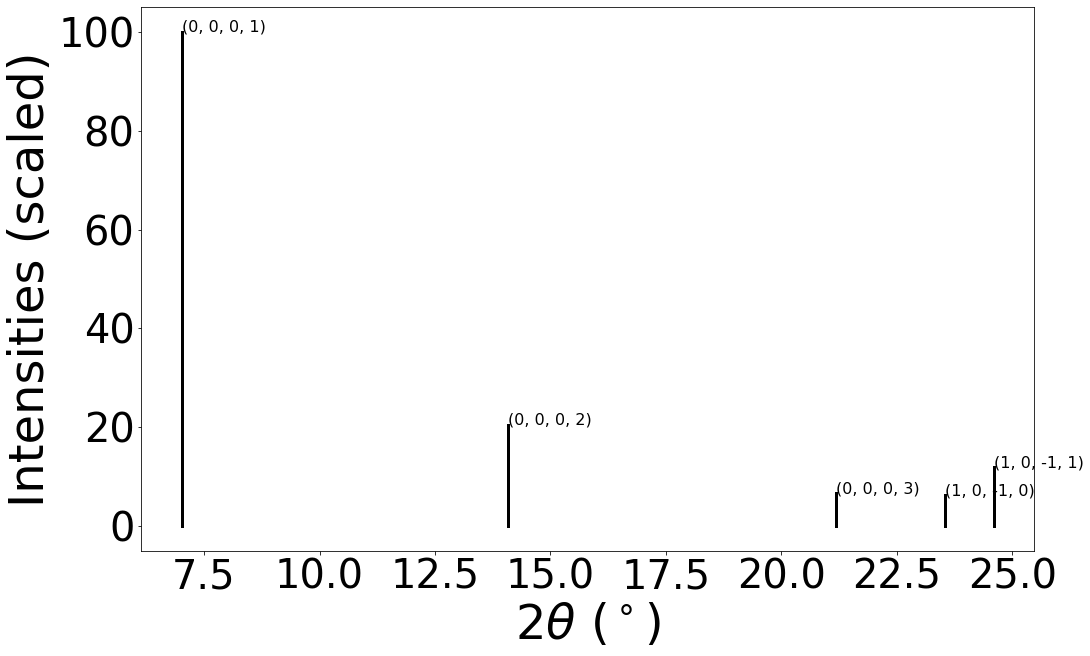

In [4]:
for i in range(0,3):
    print(tabulate([
        ["Angle 2\u03B8 : ",str(xrdpattern.x[i])+"\u00b0"],
        ["Intensité par rapport au 1er pic: ",str(xrdpattern.y[i])+"\u0025"],
        ["Indices de Miller: ",str(xrdpattern.hkls[i][0]['hkl'])],
        ["Multiplicité : ",str(xrdpattern.hkls[i][0]['multiplicity'])],
        ["Distance interplanaire : ",xrdpattern.d_hkls[i]]],
        headers=["pic n\u00b0"+str(i+1)+" :\n",""]))
    print("\n")

print("-------------------------------------------------------------------------\n")
print("Affichage des premiers pics:\n")
xrd.show_plot(structure,two_theta_range=[0,25])

Les premières interférences constructives se produisent entre les plans cristallins (001), puis (002) et enfin (003). Comme le réseau est primitif, h, k et l doivent être premiers entre eux. L'intensité des 3 premiers pics diminuent quand l'angle theta augmente et ils ont tous les 3 autant de combinaisons possibles entre h, k et l pour une diffraction particulière.

## Remarque sur les indices

On remarque qu'il y a 4 indices de Miller. En m'informant sur le sujet (https://fr.wikipedia.org/wiki/Indices_de_Miller_et_indices_de_direction), comme la structure a des symétries trigonales (système cristallin trigonal), "on définit parfois un quatrième indice pour désigner les plans, (hkil) ; c'est la notation de Bravais-Miller. L'indice i, placé en troisième position, est redondant (les trois indices h, k et l suffisent à eux seuls à définir un plan) ; il est défini par : i = -h-k. Cette notation permet d'appliquer des permutations circulaires d'indices pour définir des familles de plans."